## ETL 
Data for stroke deaths is extracted from CDC open data ( https://www.cdc.gov/dhdsp/maps/atlas/data-sources.html)
The source of Stroke Mortality data among Adults (35+) by State/Territory and County is the NVSS Deaths National Vital Statistics System. Bridged-Race Postcensal Population Estimates from National Center for Health Statistics. For the mortality the total number follows  International Classification of Diseases, 10th Revision (ICD-10) codes All Stroke: I60-I69; underlying cause of death and includes Ischemic (I63, I65-I66)  and Hemorrhagic (I60-I62). 

In [1]:
# make sure to install this package before running:
# python -m pip install --upgrade pip
!pip install sodapy

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sodapy import Socrata

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
# data
# data = "assets/data/Stroke_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv"

# The Host Name for the API endpoint (the https:// part will be added automatically)
data_url='chronicdata.cdc.gov'
# The app token created in the prior steps
MyAppToken='px7JjOQLMt0zT2f5o7utbLBcj'
username="mpmarinkovic@gmail.com"
password="!00Hagase"

# The data set at the API endpoint 

data_set_lib = ["tqwu-4a7k",'v246-z5tb','kgsi-35re', 'kpwh-eddm ','dhsy-4sea']

data_set="tqwu-4a7k" 
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

     
# Set the timeout to 60 seconds    
client.timeout = 60


In [70]:
# Get metadata about the target data set
metadata = client.get_metadata(data_set)
[x['name'] for x in metadata['columns']]

['Year',
 'LocationAbbr',
 'LocationDesc',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID',
 'LocationID',
 'Y_lat',
 'X_lon']

In [71]:
# The SoDaPy library converts this JSON object to a Python list of dictionaries
# SODA APIs are paged, and return a maximum of 50,000 records per page
# good practice to split up the request into multiple smaller queries 

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             # Start at 0
record_limit = 10000     # Fetch 2000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break


In [72]:
# Convert the list of dictionaries to a Pandas data frame
# data_df = pd.DataFrame.from_records(results, coerce_float=True)
data_df = pd.DataFrame.from_records(results)

data_df.head(5)

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,y_lat,x_lon,data_value_footnote_symbol,data_value_footnote
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Stroke Mortality,2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02013,55.442393334,-161.9599296,NaN,NaN
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Stroke Mortality,0,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02016,53.648343064,-166.9175329,NaN,NaN
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Stroke Mortality,67.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02020,61.159144533,-149.1045591,NaN,NaN
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Stroke Mortality,104.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02050,60.923647647,-159.7532618,NaN,NaN
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02060,58.753495988,-156.694662,~,Insufficient Data


In [73]:
# Check datacounts
data_df.count()

year                          59094
locationabbr                  59094
locationdesc                  59094
geographiclevel               59094
datasource                    59094
class                         59094
topic                         59094
data_value                    28095
data_value_unit               59094
data_value_type               59094
stratificationcategory1       59094
stratification1               59094
stratificationcategory2       59094
stratification2               59094
topicid                       59094
locationid                    59094
y_lat                         59076
x_lon                         59076
data_value_footnote_symbol    30999
data_value_footnote           30999
dtype: int64

In [74]:
# Check datatypes
data_df.dtypes

year                          object
locationabbr                  object
locationdesc                  object
geographiclevel               object
datasource                    object
class                         object
topic                         object
data_value                    object
data_value_unit               object
data_value_type               object
stratificationcategory1       object
stratification1               object
stratificationcategory2       object
stratification2               object
topicid                       object
locationid                    object
y_lat                         object
x_lon                         object
data_value_footnote_symbol    object
data_value_footnote           object
dtype: object

In [75]:
# client.close()

In [77]:

data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['y_lat'] = pd.to_numeric(data_df['y_lat'])
data_df['x_lon'] = pd.to_numeric(data_df['x_lon'])
data_df.dtypes

year                            int64
locationabbr                   object
locationdesc                   object
geographiclevel                object
datasource                     object
class                          object
topic                          object
data_value                    float64
data_value_unit                object
data_value_type                object
stratificationcategory1        object
stratification1                object
stratificationcategory2        object
stratification2                object
topicid                        object
locationid                      int64
y_lat                         float64
x_lon                         float64
data_value_footnote_symbol     object
data_value_footnote            object
dtype: object

In [78]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','y_lat','x_lon',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2' , 'stratification2' ,'year','data_value','data_value_unit']]          

datasub_df.head()

,locationid,locationabbr,locationdesc,y_lat,x_lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2.0,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0.0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,NaN,"per 100,000 population"


In [79]:
#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "y_lat":"lat", "x_lon":"lon","locationabbr":"state", "locationdesc": "county"})

datasub_df.head() 

,locationID,state,county,lat,lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2.0,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0.0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,NaN,"per 100,000 population"


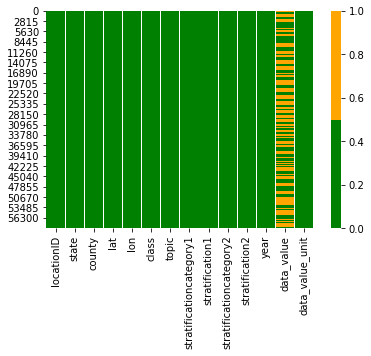

In [80]:
#cleaing data

cols = datasub_df.columns[:20] # first 30 columns
colours = ['green', 'orange'] # specify the colours - orange is missing. green is not missing.
sns.heatmap(datasub_df[cols].isnull(), cmap=sns.color_palette(colours))

In [47]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in datasub_df.columns:
    pct_missing = np.mean(datasub_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

locationID - 0.0%
state - 0.0%
county - 0.0%
lat - 0.0%
long - 0.0%
data_value - 52.0%
data_value_unit - 0.0%
class - 0.0%
topic - 0.0%
stratificationcategory1 - 0.0%
stratification1 - 0.0%
stratificationcategory2 - 0.0%
stratification2 - 0.0%
year - 0.0%


In [81]:
#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna(-1)
datasub_df.head()

,locationID,state,county,lat,lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2.0,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0.0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,-1.0,"per 100,000 population"


In [55]:
datasub_df.dtypes

id                           int64
locationID                   int64
state                       object
county                      object
lat                        float64
lon                        float64
data_value                 float64
data_value_unit             object
class                       object
topic                       object
stratificationcategory1     object
stratification1             object
stratificationcategory2     object
stratification2             object
year                         int64
dtype: object

In [82]:
#re-name the file
datayear= datasub_df['year'][1]
datayear

2017

In [83]:
data2017_df=datasub_df

In [85]:
# The Host Name for the API endpoint (the https:// part will be added automatically)
data_url='chronicdata.cdc.gov'

# The data set at the API endpoint 
data_set="v246-z5tb"   
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             # Start at 0
record_limit = 10000     # Fetch 2000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list of dictionaries to a Pandas data frame        
data_df = pd.DataFrame.from_records(results)


In [86]:
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['y_lat'] = pd.to_numeric(data_df['y_lat'])
data_df['x_lon'] = pd.to_numeric(data_df['x_lon'])

In [87]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','y_lat','x_lon',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2' , 'stratification2' ,'year','data_value','data_value_unit']] 


In [88]:
#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "y_lat":"lat", "x_lon":"lon","locationabbr":"state", "locationdesc": "county"})

datasub_df.head() 

,locationID,state,county,lat,lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year,data_value,data_value_unit
0,4,AZ,Arizona,34.292100,-111.664000,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,Hispanic,2016,58.3,"per 100,000 population"
1,13,GA,Georgia,32.654900,-83.454700,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,White,2016,81.0,"per 100,000 population"
2,29229,MO,Wright County,37.274183,-92.472155,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,Hispanic,2016,NaN,"per 100,000 population"
3,30,MT,Montana,47.033200,-109.653000,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Black,2016,NaN,"per 100,000 population"
4,37,NC,North Carolina,35.547500,-79.401900,Cardiovascular Diseases,Stroke Mortality,Gender,Male,Race/Ethnicity,White,2016,79.8,"per 100,000 population"


In [89]:
#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna(-1)
datasub_df.head()

,locationID,state,county,lat,lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year,data_value,data_value_unit
0,4,AZ,Arizona,34.292100,-111.664000,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,Hispanic,2016,58.3,"per 100,000 population"
1,13,GA,Georgia,32.654900,-83.454700,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,White,2016,81.0,"per 100,000 population"
2,29229,MO,Wright County,37.274183,-92.472155,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,Hispanic,2016,-1.0,"per 100,000 population"
3,30,MT,Montana,47.033200,-109.653000,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Black,2016,-1.0,"per 100,000 population"
4,37,NC,North Carolina,35.547500,-79.401900,Cardiovascular Diseases,Stroke Mortality,Gender,Male,Race/Ethnicity,White,2016,79.8,"per 100,000 population"


In [90]:
datasub_df.columns

Index(['locationID', 'state', 'county', 'lat', 'lon', 'class', 'topic',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'year', 'data_value', 'data_value_unit'],
      dtype='object')

In [91]:
# Merge confirmed and deaths df on all common columns
semicombined_df = pd.merge(data2017_df, datasub_df, on=['locationID','state', 'county', 'lat', 'lon',
                                                        'class', 'topic', 
                                                        'stratificationcategory1','stratification1', 'stratificationcategory2', 'stratification2'])
semicombined_df.head()

,locationID,state,county,lat,lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year_x,data_value_x,data_value_unit_x,year_y,data_value_y,data_value_unit_y
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2.0,"per 100,000 population",2016,2.0,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0.0,"per 100,000 population",2016,0.0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population",2016,65.3,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population",2016,101.4,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,-1.0,"per 100,000 population",2016,-1.0,"per 100,000 population"


In [98]:
# The data set at the API endpoint 
data_set="kgsi-35re"   
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             # Start at 0
record_limit = 10000     # Fetch 2000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list of dictionaries to a Pandas data frame        
data_df = pd.DataFrame.from_records(results)

data_df.head()


,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,location_1,:@computed_region_he4y_prf8,:@computed_region_bxsw_vy29,data_value_footnote_symbol,data_value_footnote
0,2015,AR,Sharp County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,63.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,White,T6,05135,"{'latitude': '36.161901', 'longitude': '-91.48...",26,15,NaN,NaN
1,2015,OK,Muskogee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T6,40101,"{'latitude': '35.620474', 'longitude': '-95.37...",2208,20,~,Insufficient Data
2,2015,IN,Posey County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T6,18129,"{'latitude': '38.022079', 'longitude': '-87.87...",1199,35,~,Insufficient Data
3,2015,OH,Gallia County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T6,39053,"{'latitude': '38.822247', 'longitude': '-82.31...",581,38,~,Insufficient Data
4,2015,UT,Box Elder County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,87.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Male,Race/Ethnicity,Hispanic,T6,49003,"{'latitude': '41.522414', 'longitude': '-113.0...",2985,13,NaN,NaN


In [97]:
data_df.dtypes


year                             int64
locationabbr                    object
locationdesc                    object
geographiclevel                 object
datasource                      object
class                           object
topic                           object
data_value                     float64
data_value_unit                 object
data_value_type                 object
stratificationcategory1         object
stratification1                 object
stratificationcategory2         object
stratification2                 object
topicid                         object
locationid                       int64
location_1                      object
:@computed_region_he4y_prf8     object
:@computed_region_bxsw_vy29     object
data_value_footnote_symbol      object
data_value_footnote             object
dtype: object

In [105]:
# Separate Location1 into lat and lon
data_df['location_1'][1]['latitude']

# data_df['y_lat'], data_df['x_lon'] = data_df['location_1'][1].split(',', 2).str
# data_df.

'35.620474'

In [96]:
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['y_lat'] = pd.to_numeric(data_df['y_lat'])
data_df['x_lon'] = pd.to_numeric(data_df['x_lon'])

KeyError: ignored

In [ ]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','y_lat','x_lon',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2' , 'stratification2' ,'year','data_value','data_value_unit']] 

#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "y_lat":"lat", "x_lon":"lon","locationabbr":"state", "locationdesc": "county"})

#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna(-1)

datasub_df.head()


In [92]:
# Merge confirmed and deaths df on all common columns
semicombined_df = pd.merge(semicombined_df, datasub_df, on=['locationID','state', 'county', 'lat', 'lon',
                                                        'class', 'topic', 
                                                        'stratificationcategory1','stratification1', 'stratificationcategory2', 'stratification2'])
semicombined_df.head()

In [ ]:
# Save Cleaned/Organized df to csv
clean_df.to_csv("assets/data/stroke_death_clean.csv", index=False)
